<a href="https://colab.research.google.com/github/Hebaehab765/AI4GoodLab/blob/main/Heba_M3_E3_friday_project_3_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Toxic Comment Classification Challenge](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview)

## Introduction
In a [2021 study by the Pew Research Center](https://www.pewresearch.org/internet/2021/01/13/the-state-of-online-harassment/), it was revealed that approximately four-in-ten Americans have fallen victim to online harassment, highlighting the pervasive issue of toxic comments and cyberbullying on social media platforms. Such behavior not only poses a threat to mental health but also stifles free expression and undermines constructive dialogue and diverse perspectives online.

Imagine you're the team responsible for fostering inclusivity online at a large social media companies. You've been tasked to find solutions to prevent online harrassement using your expertise in machine learning and natural language processing.

## Mission
To achieve this goal, you'll be working with a dataset of comments from Wikipedia's talk page edits. You'll have to develop a model capable of classifiying comments into 6 categories: *toxic, severe toxic, obscene, threat, insult, identity hate*.

Your team holds the power to create safer digital spaces where individuals feel empowered to express themselves without fear of harassment or intimidation. Consider the ripple effect of your efforts – your model could empower platforms to effectively moderate discussions, paving the way for healthier online communities. With your skills, you have the opportunity to shape the future of online discourse for the better.

Are you ready to be a force for positive change in the digital realm? Harness your machine learning skills, and work together to make online conversations more respectful and inclusive.

**⚠️ WARNING: the dataset for this competition contains text that may be considered profane, vulgar, or offensive. If that makes you uncomfortable you can consider [this challenge](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/data) instead.**


## Guide
If you're not sure where to start, here are some ideas to get you started. **You're not expected to complete all those** and answer all the questions. Try to save enough time to train a model and reflect on what you've learned during this group project.

### 0. Brainstorming
With your team discuss your experience with social medias, and reflect on the following topics:
- Do you think social medias do enough to fight online harassment and cyberbullying ?
- What do you think could be done to prevent such behaviours ? propose ideas to fight online harassement online.

### 1. Explore Dataset
You can start by exploring the dataset and learn more about the problem. Try to answer the following questions:
- How many samples by class is there in the dataset ? Is it relatively equilibrated ? If no, could that be a problem ?
- Display some of the comments for each categories.

Some useful references to get you started:
- https://www.kaggle.com/code/jagangupta/stop-the-s-toxic-comments-eda
- https://arxiv.org/pdf/1610.08914.pdf


### 2. Choose a Machine Learning Pipeline
Now that you're familiar with the dataset, think about what Machine Learning pipeline you want to use:
- What type of model do think would be relevant to solve this task ?
- What loss function do you want to use ?
- What optimizer do you want to use ?
- Could any data-augmentation techniques be useful ?

Go on the [Hugging Face website](https://huggingface.co/models), and choose a pretrained model to use for this task:
- How and why did you pick this model ?
- What are some specifities of the model ? What is the architecture, on what dataset was it trained ? Is there any other important information to consider about the model you picked ?

### 3. Implement your Machine Learning Pipeline
If you don't know how to get started you can look at the following [example of code](#scrollTo=P2U6lasRBoOx).

A pretrained model is also available [here](#scrollTo=-9h-H8Slsxjo) and can be used as a starting point.

### 4. Train your model
**Don't forget to modify the runtime type to GPU...**

While your model is training discuss together about what small changes you could make to the Machine Learning Pipeline to try to improve the performance of the model:
- What hyperparameters could you change ? What effect do you think it's going to have on the model ?

### 5. Evaluate your model
Now that you've trained your model it's time to evaluate it. With your group discuss the following points:
- How to evaluate the performance of the model ? What metrics could you use ?
- How does the model perform ? Could your model be deployed in the real world ? If no, why do you think it's not ready yet ?
- What do think could be potential limitations of the model you trained ?
- If you were to deploy the model in the real world, how would you monitor the performance of the model to make sure the model actually work ?
- What do you think could be some challenges of deploying the model in the real world ?

### 6. Reflect on your experience
Congratulations on training your model and helping solve an important problem !
With your group exchange together about your experience:
- What did you learn ?
- If you had more time to work on this, what would you want to work on or improve ? What would be your next steps ?
- What did you find most interesting about this group project ?

## Loading the Dataset
Before loading the dataset and running those steps, please ensure the notebook is running on a GPU instance.

In [ ]:
from torch.utils.data import Dataset
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

class ToxicCommentsDataset(Dataset):
    __NAME__ = "jigsaw-toxic-comment-classification-challenge"
    __SEED__ = 1234
    __TRAIN_SIZE__ = 0.8
    __NO_LABEL_SIZE__ = 15000
    __LABELS__ = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

    def __init__(self,  path_to_dataset, root: str  = "./data", train: bool = True):
        super().__init__()
        self.root = root
        self.base_dir = os.path.join(self.root, self.__NAME__)
        self.train_file = os.path.join(self.base_dir, 'train.csv')

        if not os.path.exists(os.path.join(self.base_dir, 'train.csv')):
            self.__extract(path_to_dataset)

        self.dataset = pd.read_csv(self.train_file)
        trainset, testset = self.split()

        if train:
          self.data = trainset
        else:
          self.data = testset


    def split(self):
      # We remove all the data where there is no label.
      rng = np.random.RandomState(self.__SEED__)
      label_index = self.dataset[self.dataset.sum(axis=1, numeric_only=True) != 0].index
      indices = rng.permutation(len(label_index))
      train_selection = indices[:int(self.__TRAIN_SIZE__*len(indices))]
      test_selection = indices[int(self.__TRAIN_SIZE__*len(indices)):]
      train_index = label_index.take(train_selection)
      test_index = label_index.take(test_selection)

      # Adding some samples with no labels.
      label_index = self.dataset[self.dataset.sum(axis=1, numeric_only=True) == 0].index
      label_index = label_index.take(rng.permutation(len(label_index))[:self.__NO_LABEL_SIZE__])
      indices = rng.permutation(len(label_index))
      train_selection = indices[:int(self.__TRAIN_SIZE__*len(indices))]
      test_selection = indices[int(self.__TRAIN_SIZE__*len(indices)):]
      train_index = train_index.append(label_index.take(train_selection))
      test_index = test_index.append(label_index.take(test_selection))

      trainset = self.dataset.iloc[train_index]
      testset = self.dataset.iloc[test_index]
      return trainset, testset

    def __getitem__(self, idx: int):
        data = self.data.iloc[idx]
        comment = data["comment_text"]
        label = data[self.__LABELS__].values.astype(np.float32)
        return {
            'text': comment,
            'labels': label
        }

    def __extract(self, path_to_dataset: str):
        print("Extracting data...")
        with zipfile.ZipFile(path_to_dataset, 'r') as z:
            z.extract("train.csv.zip", self.base_dir)

        train_file = os.path.join(self.base_dir, "train.csv.zip")

        with zipfile.ZipFile(train_file, 'r') as z:
            z.extractall(self.base_dir)

        os.remove(train_file)

    def __len__(self):
        return len(self.data)

    @property
    def num_labels(self):
        return len(self.__LABELS__)

1. Start by creating a shortcut to the [Module-3-Group-Project](https://drive.google.com/drive/folders/1SuTzKPKjKOkqGpK6cl1roR3P-5suvG1u?usp=drive_link) folder in your drive. For more information on how to create add a shortcut in Google Drive see [this document](https://support.google.com/drive/answer/9700156?hl=en&co=GENIE.Platform%3DDesktop&sjid=16338272406757761256-NA).

2. Mount your drive using the following command

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Locate the path to the [Jigsaw Toxic Comment dataset](https://drive.google.com/file/d/1D6wqHDGbNr1i0_FRt1FtK66vFODFPF3_/view?usp=drive_link) in the Files of your runtime. The path should look like this: `/content/drive/MyDrive/Module-3-Group-Project/jigsaw-toxic-comment-classification-challenge.zip`.

4. Use this path to load the dataset using the following command.

In [ ]:
trainset = ToxicCommentsDataset("/content/drive/MyDrive/AI4GoodLab/Week3/jigsaw-toxic-comment-classification-challenge.zip", train=True)
validset = ToxicCommentsDataset("/content/drive/MyDrive/AI4GoodLab/Week3/Module-3-Group-Project/jigsaw-toxic-comment-classification-challenge.zip", train=False)

print(f"Trainset size: {len(trainset)}, Validset size: {len(validset)}")
print(f"Example from dataset: {trainset[0]['text']}")
print()
print("Number of samples per label in trainset:")
print(trainset.data.sum(axis=0, numeric_only=True))
print()
print("Number of samples per label in testset:")
print(validset.data.sum(axis=0, numeric_only=True))

Extracting data...
Trainset size: 24980, Validset size: 6245
Example from dataset: Stop...
Quit reverting my updated to the Creed article. There's nothing wrong with the part I added or the seperate section. Idk what the fuck youre talking about when you say unreferenced shit.

Number of samples per label in trainset:
toxic            12240
severe_toxic      1285
obscene           6795
threat             387
insult            6318
identity_hate     1126
dtype: int64

Number of samples per label in testset:
toxic            3054
severe_toxic      310
obscene          1654
threat             91
insult           1559
identity_hate     279
dtype: int64


## Baseline Model

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from tqdm.auto import tqdm
'''
class BaselineModel:
  def __init__(self, num_labels: int):
    self.num_labels = num_labels
    self.tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
    self.model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=num_labels, problem_type="multi_label_classification")

  def process_inputs(self, inputs, device):
    inputs = self.tokenizer(inputs, return_tensors="pt", padding="max_length", truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    return inputs

  def __call__(self, inputs, labels=None):
    return self.model(**inputs, labels=labels)

  def predict(self, inputs, device):
    inputs = self.process_inputs(inputs, device)
    with torch.no_grad():
        outputs = self.model(**inputs)
    return outputs.logits

  @staticmethod
  def load(filename: str):
      checkpoint = torch.load(filename)
      model = BaselineModel(checkpoint["num_labels"])
      model.model.load_state_dict(checkpoint["params"])
      return model

  def save(self, filename: str):
    torch.save({"num_labels": self.num_labels, "params": self.model.state_dict()}, filename)

def evaluate(model, dataloader, metrics, device, debug = False):
  model.model.eval()
  for metric in metrics:
      metric.to(device)
      metric.reset()

  for eval_batch in tqdm(eval_dataloader):
    inputs, labels = eval_batch["text"], eval_batch["labels"]
    inputs = model.process_inputs(inputs, device)
    labels = labels.to(device)
    with torch.no_grad():
        outputs = model(inputs, labels)
        if debug:
            break

    for metric in metrics:
        metric.update(outputs.logits, labels.long())

  return metrics
'''

'\nclass BaselineModel:\n  def __init__(self, num_labels: int):\n    self.num_labels = num_labels\n    self.tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")\n    self.model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=num_labels, problem_type="multi_label_classification")\n\n  def process_inputs(self, inputs, device):\n    inputs = self.tokenizer(inputs, return_tensors="pt", padding="max_length", truncation=True)\n    inputs = {k: v.to(device) for k, v in inputs.items()}\n    return inputs\n\n  def __call__(self, inputs, labels=None):\n    return self.model(**inputs, labels=labels)\n\n  def predict(self, inputs, device):\n    inputs = self.process_inputs(inputs, device)\n    with torch.no_grad():\n        outputs = self.model(**inputs)\n    return outputs.logits\n\n  @staticmethod\n  def load(filename: str):\n      checkpoint = torch.load(filename)\n      model = BaselineModel(checkpoint["num_labels"])\n      model.model.load_state_dict

In [ ]:
from torch.utils.data import DataLoader
import torch
from torchmetrics.classification import Accuracy, F1Score, ConfusionMatrix
'''
eval_dataloader = DataLoader(validset, batch_size=32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

acc = Accuracy(task="multilabel", num_labels=trainset.num_labels, average=None).to(device)
f1 = F1Score(task="multilabel", num_labels=trainset.num_labels, average=None).to(device)
confusion_matrix = ConfusionMatrix(task="multilabel", num_labels=trainset.num_labels).to(device)

model = BaselineModel.load("/content/drive/MyDrive/ai4good_my_colab_files/Module-3-Group-Project/baseline.pt")
model.model.to(device)

model.model.eval()

metrics = evaluate(model, eval_dataloader, [acc, f1, confusion_matrix], device)

eval_acc = metrics[0].compute()
s = ""
for i, label in enumerate(trainset.__LABELS__):
  s += f"{label}: {eval_acc[i]:.2%} "
print(f"Accuracy: " + s)

eval_f1 = metrics[1].compute()
s = ""
for i, label in enumerate(trainset.__LABELS__):
  s += f"{label}: {eval_f1[i]:.2%} "
print(f"F1: " + s)

confusion_matrix.plot(labels=trainset.__LABELS__)
'''

'\neval_dataloader = DataLoader(validset, batch_size=32)\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\nacc = Accuracy(task="multilabel", num_labels=trainset.num_labels, average=None).to(device)\nf1 = F1Score(task="multilabel", num_labels=trainset.num_labels, average=None).to(device)\nconfusion_matrix = ConfusionMatrix(task="multilabel", num_labels=trainset.num_labels).to(device)\n\nmodel = BaselineModel.load("/content/drive/MyDrive/ai4good_my_colab_files/Module-3-Group-Project/baseline.pt")\nmodel.model.to(device)\n\nmodel.model.eval()\n\nmetrics = evaluate(model, eval_dataloader, [acc, f1, confusion_matrix], device)\n\neval_acc = metrics[0].compute()\ns = ""\nfor i, label in enumerate(trainset.__LABELS__):\n  s += f"{label}: {eval_acc[i]:.2%} "\nprint(f"Accuracy: " + s)\n\neval_f1 = metrics[1].compute()\ns = ""\nfor i, label in enumerate(trainset.__LABELS__):\n  s += f"{label}: {eval_f1[i]:.2%} "\nprint(f"F1: " + s)\n\nconfusion_matrix.plot(labels=trainset.

**Test the model with your own sentence, what do you observe ?**

In [ ]:
'''
def answer(text):
  outputs = (model.predict(text, device).sigmoid() > 0.5).squeeze()
  print(text)
  for label, output in zip(trainset.__LABELS__, outputs):
      print(f"{label}: {output == True}")

answer("The pride as opposed to shame and social stigma, is the predominant outlook that bolsters most LGBT rights movements.")
print()
answer("In the English language, nigger is a racial slur directed at black people.")
'''

The pride as opposed to shame and social stigma, is the predominant outlook that bolsters most LGBT rights movements.
toxic: False
severe_toxic: False
obscene: False
threat: False
insult: False
identity_hate: False

In the English language, nigger is a racial slur directed at black people.
toxic: True
severe_toxic: False
obscene: True
threat: False
insult: False
identity_hate: True


## Training a model

In [ ]:
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch

class Trainer:
    def __init__(self, model, optimizer, device: str = "cpu"):
        self.model = model
        self.optimizer = optimizer
        self.model.model.to(device)
        self.device = device

    def train_iter(self, batch):
        self.optimizer.zero_grad()
        inputs = self.model.process_inputs(batch["text"], self.device)
        labels = batch["labels"].to(device)
        outputs = self.model(inputs, labels)
        loss = outputs.loss
        loss.backward()

        self.optimizer.step()

##IMPORTANT NOTE:

The cell below shows how to use the trainer class to train a model. We don;t need to run it unless we want to train our model, so just commenting it out to save time! (Afia)

In [ ]:
'''
from torch.utils.data import Subset
from torchmetrics.classification import Accuracy, F1Score, ConfusionMatrix
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch
import os

os.makedirs("./fig", exist_ok=True)

debug = False
num_epochs = 10
eval_frequency = 500
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataloader = DataLoader(trainset, shuffle=True, batch_size=batch_size)
eval_dataloader = DataLoader(validset, batch_size=batch_size)
# labels = next(iter(eval_dataloader))["labels"]
# print(labels.sum(0))

model = BaselineModel(trainset.num_labels)
optimizer = Adam(model.model.parameters(), lr=1e-4)
trainer = Trainer(model, optimizer, device=device)

acc = Accuracy(task="multilabel", num_labels=trainset.num_labels, average=None).to(device)
f1 = F1Score(task="multilabel", num_labels=trainset.num_labels, average=None).to(device)
confusion_matrix = ConfusionMatrix(task="multilabel", num_labels=trainset.num_labels).to(device)

model.model.train()
iteration = 1
for epoch in range(num_epochs):
    for batch in tqdm(train_dataloader):
        trainer.train_iter(batch)

        if iteration % eval_frequency == 0:
            metrics = evaluate(model, eval_dataloader, [acc, f1, confusion_matrix], device, debug)
            model.model.train()

            eval_acc = metrics[0].compute()
            s = ""
            for i, label in enumerate(trainset.__LABELS__):
              s += f"{label}: {eval_acc[i]:.2%} "
            print(f"Iteration {iteration} Accuracy: " + s)

            eval_f1 = metrics[1].compute()
            s = ""
            for i, label in enumerate(trainset.__LABELS__):
              s += f"{label}: {eval_f1[i]:.2%} "
            print(f"Iteration {iteration} F1: " + s)

            confusion_matrix.plot(labels=trainset.__LABELS__)
            plt.savefig(f"./fig/confusion_matrix_{iteration}.png")

        iteration += 1
'''

#E3: Our Code Starts Here 🔥



## Your turn to Code !

Step 1: Exploraroty Data Analysis (EDA)

We try to understand our data. Try following the comment prompts for EDA.

From the code blocks above, these are the variables, functions, and Classes we can reuse:

**train_dataloader**: contains all training data

**eval_dataloader**: contains all test data

**trainer**: a Class that we can use to train our model

**evaluate**: a function that we can use to evaluate any model. We call this function by writing: *evaluate(<<our_model_name_goes_here>>, eval_dataloader, [acc, f1, confusion_matrix], device)*

##Important Note

In pytorch, DataLoaders (e.g. the train_dataloader and valid_dataloader variables for this code) organize the dataset into multiple batches. In some cell of this file, when we first defined train_dataloader and valid_dataloader, we said batch_size=32. So, for us, it's be 32.

So, this is how our train_dataloader looks like:

batch 1: first 32 data samples and their lables
batch 2: next 32 data samples and their labels
...
...
batch n: last 32 data samples and their labels

Question is, how do we use this dataloaedr thing?

Well, sadly, we can't just 'go find a documentation and use it' today :(

👿 WTH! WHY ??? 👿

-Because in this code dataloaders are created using trainset and validset (if we look at the 3rd cell, these sets are instances of the ToxicCommentsDataset Class, that WE DEFINED OURSELVES!)

How on earth would Pytorch have some documentation for something that we defined? 😞

But, hey! The ToxicCommentsDataset Class can work as a documentation for us, right? Let's see if we can understand the class and use it!

Look at the function: ToxicCommentDataset.__get_item__() which returns a dictionary. This overrides the [ ] access in python. That means, whenever we use [ ] with any instance of this ToxicCommentDataset class, we get a dictionary.

In [ ]:
#I commented out some cells and hence need to copy-paste some variables here. Don't worry about them!
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_dataloader = DataLoader(trainset, shuffle=True, batch_size=batch_size)
eval_dataloader = DataLoader(validset, batch_size=batch_size)
# Done copy-pasting!

#What's the type of our trainset?
print(type(trainset))

#Oops, trainset is of type ToxicCommentsDataset--> which is something we defined -_- So, we have deal with it without any documentation :(
#Can you print the first sample from trainset?
print(trainset[3])

#As we guessed, this is a dictionary. Makes sense! Cause __getitem__ return a dictionary!
#How many training and test data do we have?
print(len(trainset))
print(len(validset))
#YOUR CODE HERE


#How many features do we have?
print(trainset[7])
print(trainset[8])
print(trainset[0])
#To answer this question, try printing 3 samples from trainset and find the answer. It might be shocking!


<class '__main__.ToxicCommentsDataset'>
{'text': 'Good to see the neo-Nazi Wikipedia editors all stick together. Good work, fellas! Victory or Valhalla!\n\nWhy do you keep reverting my factual edits to the Alex Linder article, Nazi?\n\n Mauricio Macri is a complete imbecile```` \n\nI think that Mr.Macri, all he wants is to give rights for just all of his buddies.D:', 'labels': array([1., 0., 0., 0., 0., 0.], dtype=float32)}
24980
6245
{'text': 'Here is my badge of honor bitches )', 'labels': array([1., 0., 1., 0., 1., 0.], dtype=float32)}
{'text': 'Why are you such a troll? \n\nSeriously?', 'labels': array([1., 0., 0., 0., 0., 0.], dtype=float32)}
{'text': "Stop...\nQuit reverting my updated to the Creed article. There's nothing wrong with the part I added or the seperate section. Idk what the fuck youre talking about when you say unreferenced shit.", 'labels': array([1., 0., 1., 0., 1., 0.], dtype=float32)}


##Next Task: WHat kind of problem is it?

See the 'labels' for each sample. Why does each sample have multiple '1's?

ANswer: It's a multi-label classification, which is different from multi-class classification.

In the next cell, we try to visualize this idea. We want to plot a bar plot to see how many comments have 0 tags, how many have 1 tag, how many have 2 tags.... and so on. The plot would look like this:

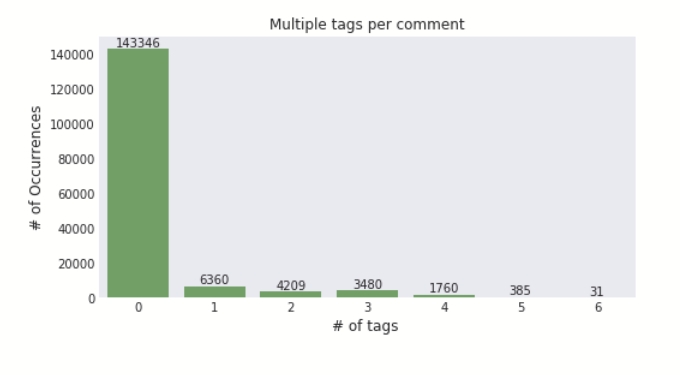

In [ ]:
#Cell goal: fill the dictionary named dict_tag_count_of_comments

#use a for loop to go through the trainset. Read each label, how many 1s are there in that label? That'd be the number_of_tags for that data.
#Example:
'''
for each sample in trainset:
  say, label of that sample is: [1, 0, 1, 0, 1, 1]
  so, this sample has 4 tags.
  do this for all samples one by one using this loop and use something to store these counts. I'd prefer a dictionary for storage purpose.
'''
dict_tag_count_of_comments = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
for sample in trainset:
  number_of_tags = sum(sample['labels'])
  #print(number_of_tags)
  dict_tag_count_of_comments[number_of_tags] = dict_tag_count_of_comments[number_of_tags] + 1

#the key of this dict is: 'n', value is: how many sample gets n tags?


print(dict_tag_count_of_comments)

{0: 12000, 1: 5053, 2: 2797, 3: 3380, 4: 1411, 5: 314, 6: 25}


<BarContainer object of 7 artists>

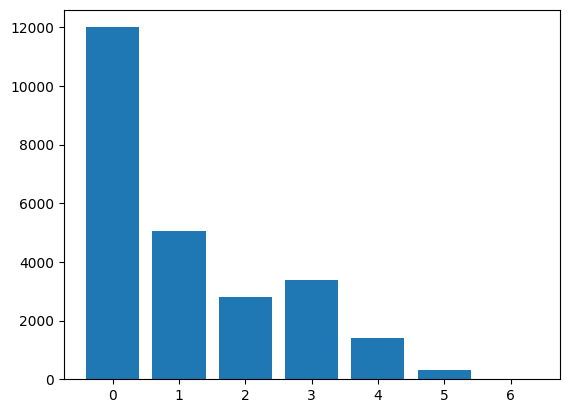

In [ ]:
#Cell goal: plot the dictionary as a bar plot

import matplotlib.pyplot as plt
#use plt.bar function, it's the easiest for this job. Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

X = dict_tag_count_of_comments.keys()
height = dict_tag_count_of_comments.values()
plt.bar(X, height)

##What does the figure above tell us?

That, some data samples/ comments have 0 tags.

Some have 1 tag.

SOme have more than 1! Tha means, it's not a multi-class classification problem anymore, it's a multi-label classification problem where each data can belong to multiple classes (or, more correctly can be assigned multiple labels).

##Next Task: Is our dataset balanced?

To understand this, can you plot something like this?

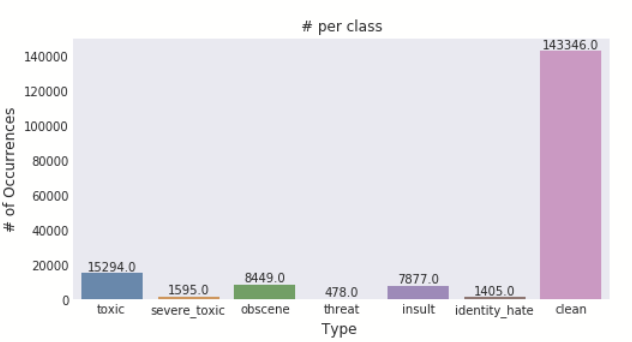

In [ ]:
dict_count_sample_per_class= {"toxic":0, "severe_toxic":0, "obscene":0, "threat":0, "insult":0, "identity_hate":0, 'clean': 0}

#again, do a for loop and count how many samples belong to each label!

for sample in trainset:
  if sum(sample['labels']) == 0:
      dict_count_sample_per_class['clean'] = dict_count_sample_per_class['clean'] + 1
  if sample['labels'][0] == 1:
    dict_count_sample_per_class['toxic'] = dict_count_sample_per_class['toxic'] + 1
  if sample['labels'][1] == 1:
    dict_count_sample_per_class['severe_toxic'] = dict_count_sample_per_class['severe_toxic'] + 1
  if sample['labels'][2] == 1:
    dict_count_sample_per_class['obscene'] = dict_count_sample_per_class['obscene'] + 1
  if sample['labels'][3] == 1:
    dict_count_sample_per_class['threat'] = dict_count_sample_per_class['threat'] + 1
  if sample['labels'][4] == 1:
    dict_count_sample_per_class['insult'] = dict_count_sample_per_class['insult'] + 1
  if sample['labels'][5] == 1:
    dict_count_sample_per_class['identity_hate'] = dict_count_sample_per_class['identity_hate'] + 1



print(dict_count_sample_per_class)



{'toxic': 12240, 'severe_toxic': 1285, 'obscene': 6795, 'threat': 387, 'insult': 6318, 'identity_hate': 1126, 'clean': 12000}


<BarContainer object of 7 artists>

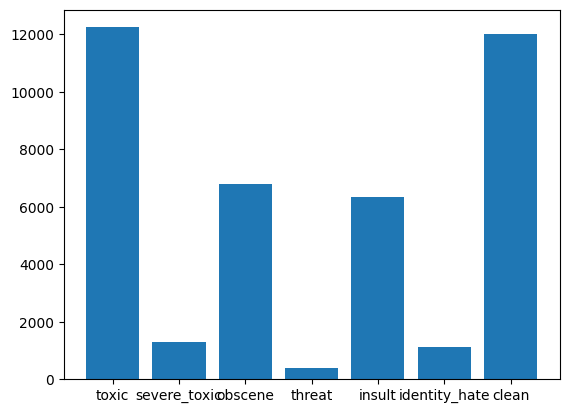

In [ ]:
#plot the dict
X_second = dict_count_sample_per_class.keys()
height_second = dict_count_sample_per_class.values()
plt.bar(X_second, height_second)